# Comparing results

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# y_pred_lstm = pd.read_csv('../predictions/y_pred_lstm.csv')
# y_pred_arima = pd.read_csv('../predictions/y_pred_arima.csv')
# y_pred_sarima = pd.read_csv('../predictions/y_pred_sarima.csv')
y_pred_lightgbm = pd.read_csv('../predictions/y_pred_lightgbm.csv')
y_pred_extra_trees = pd.read_csv('../predictions/y_pred_extra_tree.csv')
y_pred_xgboost = pd.read_csv('../predictions/y_pred_xgboost.csv')
y_pred_random_forest = pd.read_csv('../predictions/y_pred_rf.csv')

y_pred_lstm = pd.read_csv('../predictions/y_pred_lightgbm.csv')
y_pred_arima = pd.read_csv('../predictions/y_pred_lightgbm.csv')
y_pred_sarima = pd.read_csv('../predictions/y_pred_lightgbm.csv')

In [3]:
# Loading the true labels for the test set
y_test = pd.read_csv('../predictions/y_test.csv')

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

metrics_lstm = evaluate_model(y_test, y_pred_lstm)
metrics_arima = evaluate_model(y_test, y_pred_arima)
metrics_lightgbm = evaluate_model(y_test, y_pred_lightgbm)
metrics_sarima = evaluate_model(y_test, y_pred_sarima)
metrics_extra_trees = evaluate_model(y_test, y_pred_extra_trees)
metrics_xgboost = evaluate_model(y_test, y_pred_xgboost)
metrics_random_forest = evaluate_model(y_test, y_pred_random_forest)

metrics_df = pd.DataFrame({
    'Model': ['LSTM', 'ARIMA', 'LightGBM Regressor', 'S-ARIMA', 'Extra Tree Regressor', 'XGBoost', 'Random Forest Regressor'],
    'MAE': [metrics_lstm[0], metrics_arima[0], metrics_lightgbm[0], metrics_sarima[0], metrics_extra_trees[0], metrics_xgboost[0], metrics_random_forest[0]],
    'MSE': [metrics_lstm[1], metrics_arima[1], metrics_lightgbm[1], metrics_sarima[1], metrics_extra_trees[1], metrics_xgboost[1], metrics_random_forest[1]],
    'RMSE': [metrics_lstm[2], metrics_arima[2], metrics_lightgbm[2], metrics_sarima[2], metrics_extra_trees[2], metrics_xgboost[2], metrics_random_forest[2]],
    'R2': [metrics_lstm[3], metrics_arima[3], metrics_lightgbm[3], metrics_sarima[3], metrics_extra_trees[3], metrics_xgboost[3], metrics_random_forest[3]]
})

print(metrics_df)

                     Model        MAE          MSE       RMSE        R2
0                     LSTM  20.444796  1468.749533  38.324268  0.515962
1                    ARIMA  20.444796  1468.749533  38.324268  0.515962
2       LightGBM Regressor  20.444796  1468.749533  38.324268  0.515962
3                  S-ARIMA  20.444796  1468.749533  38.324268  0.515962
4     Extra Tree Regressor  20.294925  1374.938673  37.080165  0.546878
5                  XGBoost  20.860481  1448.366317  38.057408  0.522680
6  Random Forest Regressor  20.551892  1367.768411  36.983353  0.549241


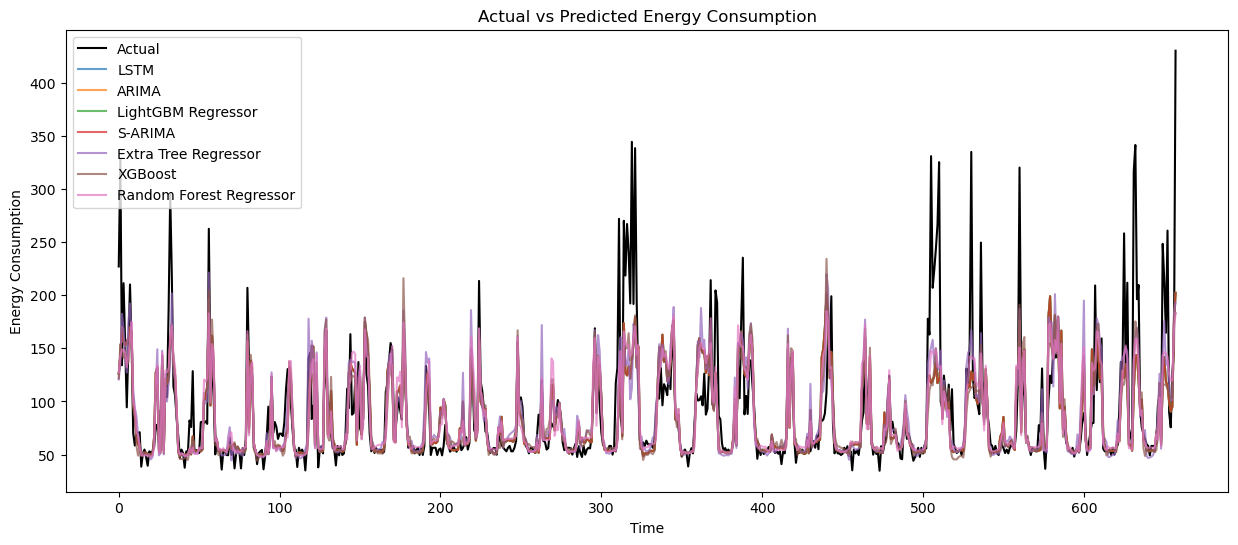

In [8]:
plt.figure(figsize=(15, 6))

plt.plot(y_test, label='Actual', color='black')
plt.plot(y_pred_lstm, label='LSTM', alpha=0.7)
plt.plot(y_pred_arima, label='ARIMA', alpha=0.7)
plt.plot(y_pred_lightgbm, label='LightGBM Regressor', alpha=0.7)
plt.plot(y_pred_sarima, label='S-ARIMA', alpha=0.7)
plt.plot(y_pred_extra_trees, label='Extra Tree Regressor', alpha=0.7)
plt.plot(y_pred_xgboost, label='XGBoost', alpha=0.7)
plt.plot(y_pred_random_forest, label='Random Forest Regressor', alpha=0.7)

plt.legend()
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.show()

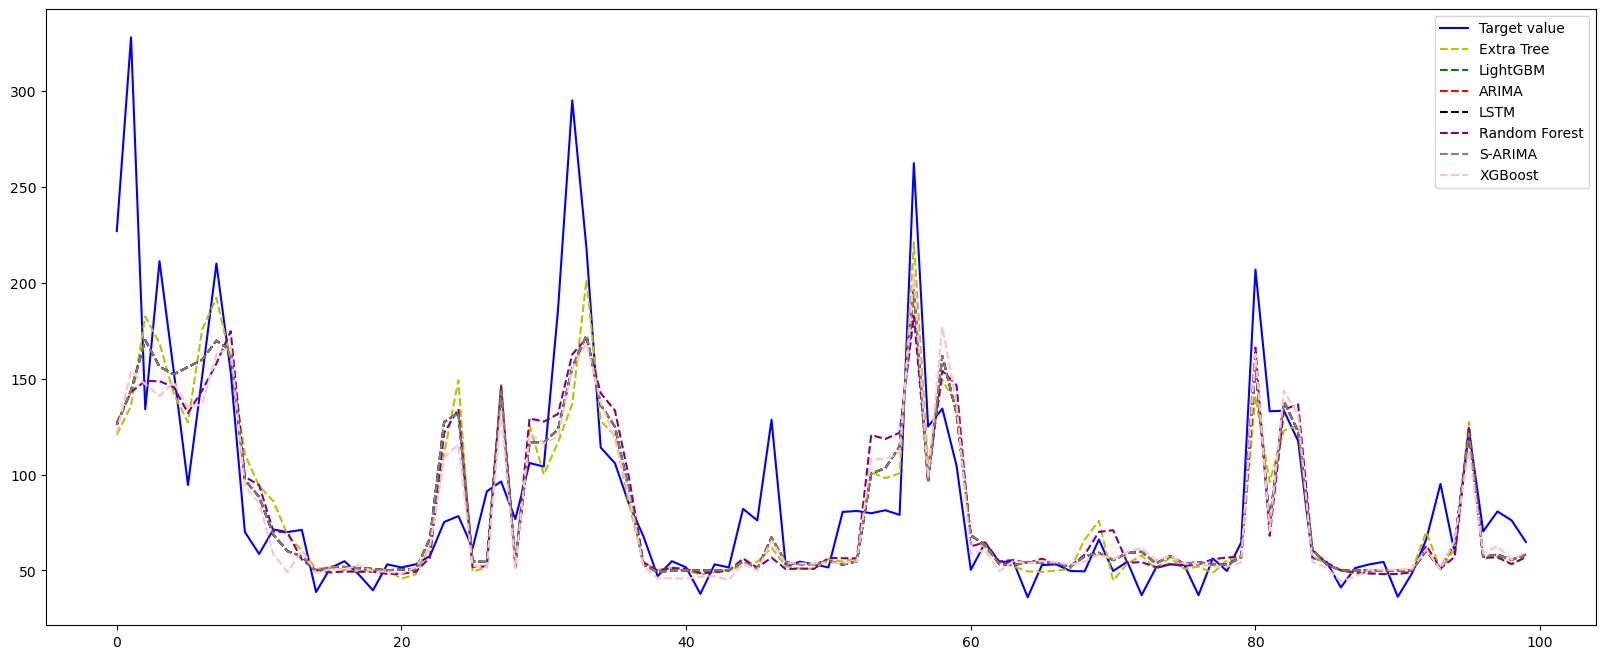

In [9]:
fig = plt.figure(figsize=(20,8))
plt.plot(y_test[:100].values, label='Target value',color='b')
plt.plot(y_pred_extra_trees[:100], label='Extra Tree', linestyle='--', color='y')
plt.plot(y_pred_lightgbm[:100], label='LightGBM', linestyle='--', color='g')
plt.plot(y_pred_arima[:100], label='ARIMA', linestyle='--', color='r')
plt.plot(y_pred_lstm[:100], label='LSTM', linestyle='--', color='black')
plt.plot(y_pred_random_forest[:100], label='Random Forest', linestyle='--', color='purple')
plt.plot(y_pred_sarima[:100], label='S-ARIMA', linestyle='--', color='gray')
plt.plot(y_pred_xgboost[:100], label='XGBoost', linestyle='--', color='pink')

plt.legend(loc=1)